In [25]:
!pip install benchmarx==0.0.10 --quiet

In [28]:
# Imports
from benchmarx import Benchmark, QuadraticProblem
import jax.numpy as jnp
from jax import random

In [29]:
# Create Quadratic Problem
n = 3       # dimension
qp = QuadraticProblem(n=n)

# initial point
RNG = random.PRNGKey(1230)
RNG, _ = random.split(RNG)
x_init = random.normal(RNG, (n,))

In [33]:
# Benchmark object to create an experiment
benchmark = Benchmark(
        problem=qp,
        runs=4,
        methods= [
            {
                'ArmijoSGD': {
                    'x_init': x_init,
                    'tol': 1e-9,
                    'maxiter': 200,
                    'label': 'Armijo SGD'
                }
            }
        ],
        metrics=[
            "nit",
            "history_x",
            "history_f",
            "history_df"
        ]
    )

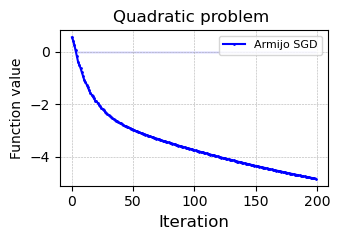

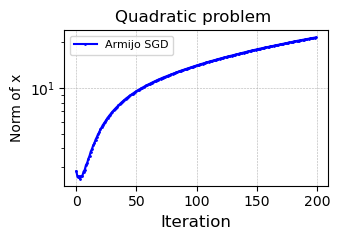

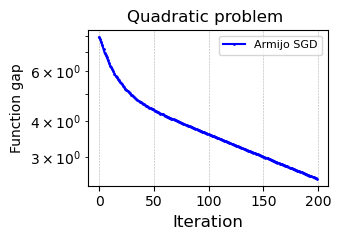

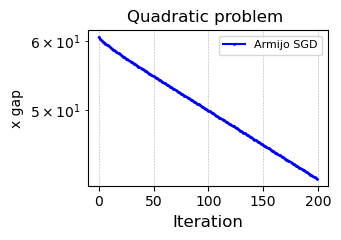

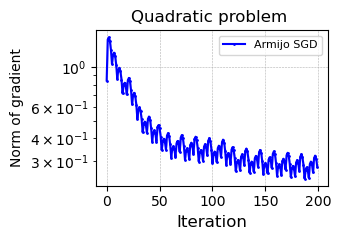

In [34]:
result = benchmark.run()
result.plot(
        metrics_to_plot= ['fs', 'xs_norm', 'f_gap', 'x_gap', 'grads_norm'],
        data_path='qp_sgd_data.json',
        dir_path='plots',
        fname_append='qp_sgd',
        show=True,
        log=True 
    )